# Import necessary libraries

In [3]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

sys.path.append(str(Path.cwd().parent))


##### Load the CSV file containing the LCS algorithm performance results

In [4]:
csv_file = "performance_results.csv"
df = pd.read_csv(csv_file)

In [5]:
# Basic analysis: summary statistics of the performance metrics (time and memory)
summary_stats = df.describe()
print("Summary statistics of performance metrics:")
print(summary_stats)

Summary statistics of performance metrics:
       String Size   LCS Result   Time (s)  Memory (MB)
count     9.000000     9.000000   9.000000     9.000000
mean    986.666667   641.111111   2.749442     2.230903
std    1640.937232  1069.137087   6.425724     4.125078
min      10.000000     5.000000   0.205060     0.000000
25%      50.000000    29.000000   0.211278     0.015625
50%     200.000000   130.000000   0.237516     0.265625
75%    1000.000000   646.000000   0.817445     1.992188
max    5000.000000  3254.000000  19.753360    12.808594


In [6]:
# Group by algorithm and calculate the mean time and memory usage for each algorithm
algorithm_stats = df.groupby("Algorithm")[["Time (s)", "Memory (MB)"]].mean()
print("\nAverage performance of each algorithm:")
print(algorithm_stats)


Average performance of each algorithm:
           Time (s)  Memory (MB)
Algorithm                       
DP         2.749442     2.230903


(array([0]), [Text(0, 0, 'DP')])

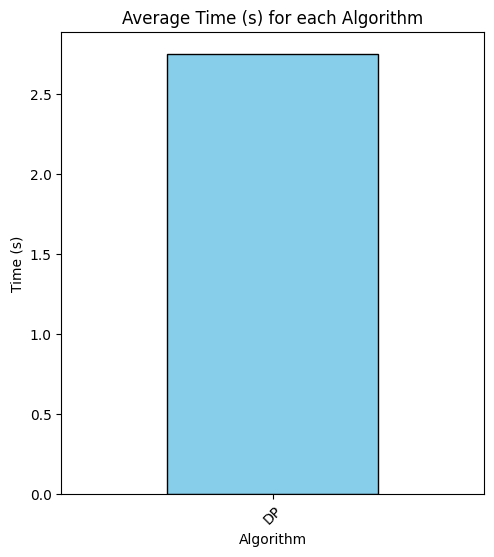

In [7]:
# Visualize the performance of each algorithm
plt.figure(figsize=(12, 6))
# Plot Time (s) for each algorithm
plt.subplot(1, 2, 1)
df.groupby("Algorithm")["Time (s)"].mean().plot(
    kind="bar", color="skyblue", edgecolor="black"
)
plt.title("Average Time (s) for each Algorithm")
plt.ylabel("Time (s)")
plt.xticks(rotation=45)

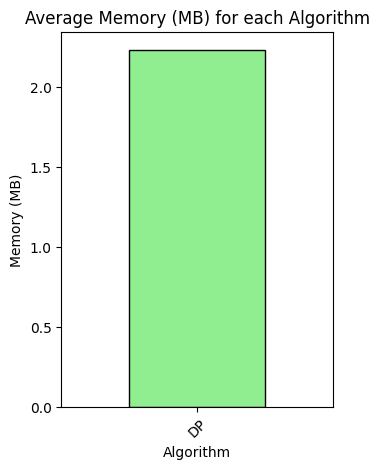

In [8]:
# Plot Memory (MB) for each algorithm
plt.subplot(1, 2, 2)
df.groupby("Algorithm")["Memory (MB)"].mean().plot(
    kind="bar", color="lightgreen", edgecolor="black"
)
plt.title("Average Memory (MB) for each Algorithm")
plt.ylabel("Memory (MB)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

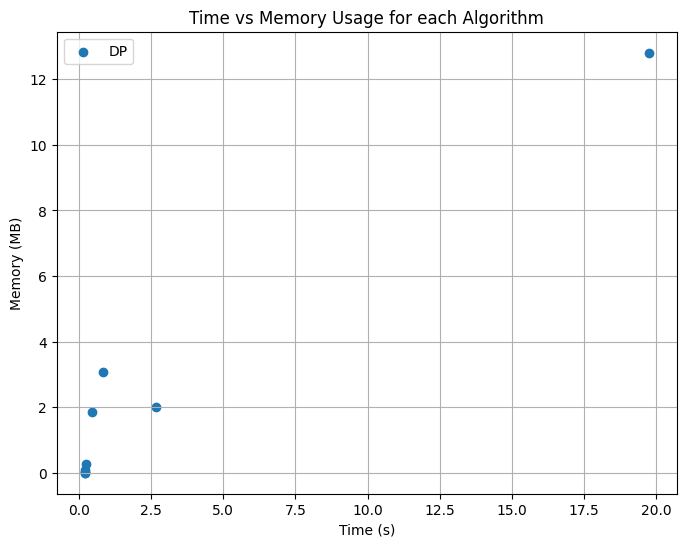

In [9]:
# Additional Analysis: Comparing Time vs. Memory for each algorithm
plt.figure(figsize=(8, 6))
for algorithm in df["Algorithm"].unique():
    algorithm_data = df[df["Algorithm"] == algorithm]
    plt.scatter(
        algorithm_data["Time (s)"], algorithm_data["Memory (MB)"], label=algorithm
    )

plt.title("Time vs Memory Usage for each Algorithm")
plt.xlabel("Time (s)")
plt.ylabel("Memory (MB)")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
import pandas as pd
import numpy as np
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))
from complexity.analyser import ComplexityAnalyzer
# Load performance results
csv_file = "performance_results.csv"
df = pd.read_csv(csv_file)

# Extract data for analysis
sizes = df["String Size"].values
times = df["Time (s)"].values

# Initialize the complexity analyzer
analyzer = ComplexityAnalyzer()

# Determine the best-fitting complexity function
best_fit_name, best_fit_function = analyzer.get_best_fit(
    x=np.array(sizes), y=np.array(times)
)

print(f"The best-fitting complexity function is: {best_fit_name}")

# Optional: Save the analysis results
output_file = "complexity_analysis_results.txt"
with open(output_file, "w") as f:
    f.write(f"The best-fitting complexity function is: {best_fit_name}\n")
    f.write("Raw Data:\n")
    f.write(df.to_string(index=False))
    print(f"Complexity analysis results saved to {output_file}")


The best-fitting complexity function is: O(n^2)
Complexity analysis results saved to complexity_analysis_results.txt


c:\Users\dell\Desktop\Tp\AdvancedAlgorithmsTP\complexity\analyser.py:80: RuntimeWarning: invalid value encountered in double_scalars
  coef = sigma_gn_y.sum() / sigma_gn_squared.sum()
